# Obtaining and Importing the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce

The dataset has been obtained from Kaggle( which has originally been obtained from the Spotify API with some modifications for ease in analysis.)

In [2]:
genre_data = pd.read_csv('DataSet/data_by_genres.csv')
year_data = pd.read_csv('DataSet/data_by_year.csv')
artist_data = pd.read_csv('DataSet/data_by_artist.csv.zip')
total_data = pd.read_csv('DataSet/data.csv.zip')
total_data_w_genres = pd.read_csv('DataSet/data_w_genres.csv.zip')

In [3]:
year_data.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [4]:
year_data.columns

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [6]:
total_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Both columns release data and year seem to fulfill the same purpose however release date has more data and may be useful later for Time series analysis.

The datasets seem to be clean(no NA's) as they were probably already cleaned before the upload to Kaggle, thus saving time instead of directly accessing the Spotify API.

# EDA

In [7]:
total_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


### Correlation Heatmap

Let's obtain a correlation heatmap for the Total Data.

C:\Users\utsav\AppData\Local\Temp/ipykernel_16968/4168548913.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


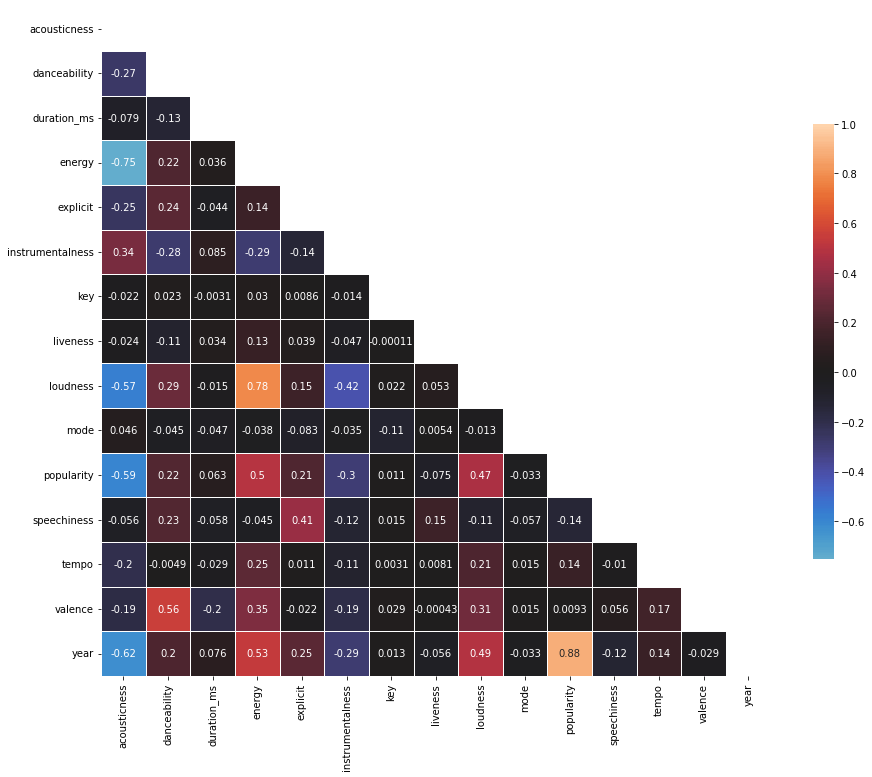

In [9]:
corr = total_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .4})

plt.savefig('Images/correlation.png')

As we can see Energy and Loudness, Popularity and Year seem to have a high positive correlation

## Tracks per Year

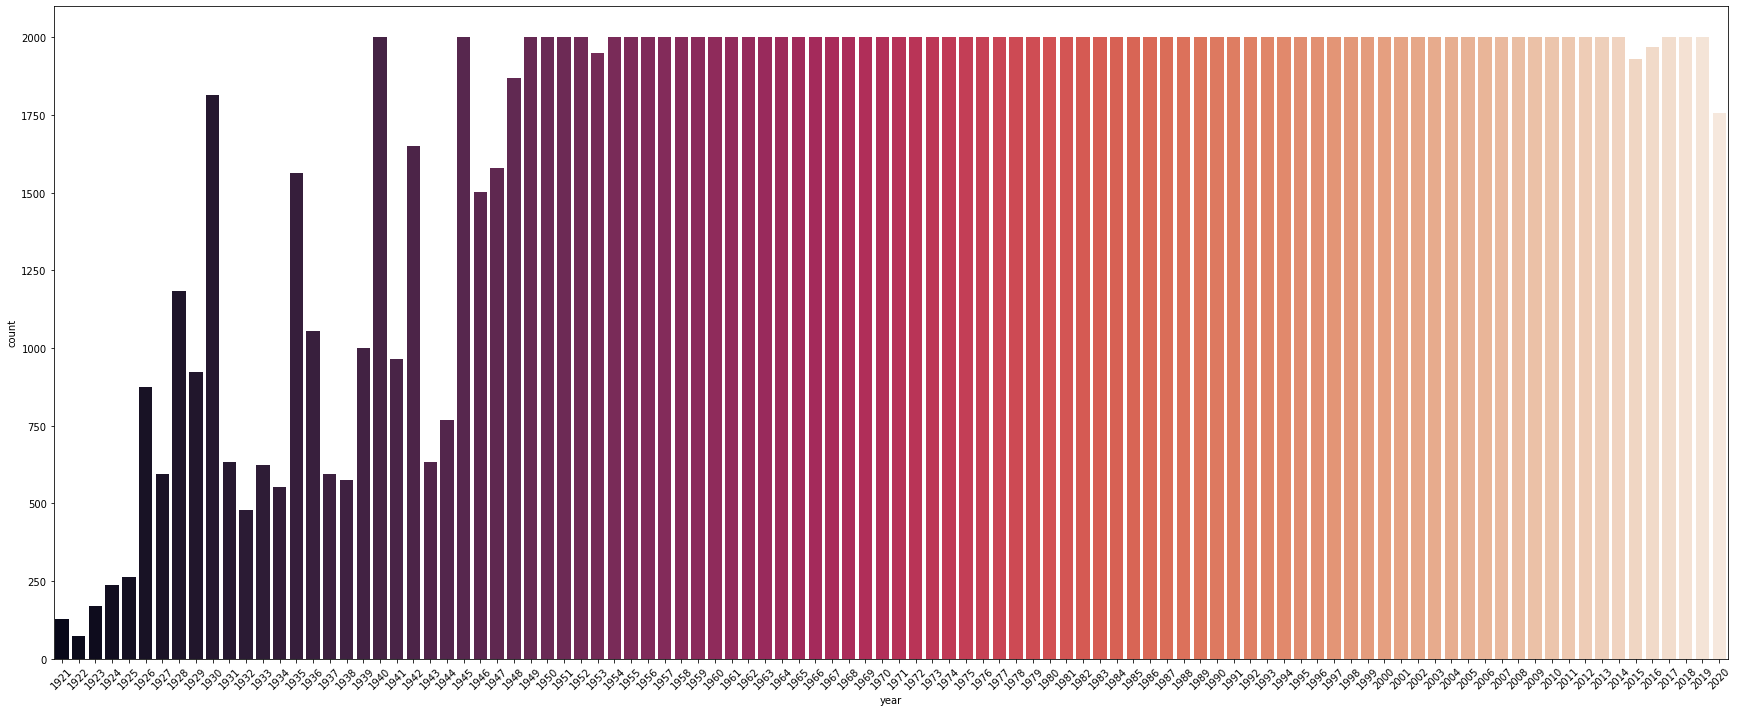

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(30,12))
sns.countplot(x=total_data.year,palette='rocket', color='k')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Images/track_per_year_countplot.png')

Given the above graph it is fair to assume that the dataset obtained has been capped at a max of 2000 songs per year.

Now plotting the Histograms for all the columns in total_data we get - 

C:\Users\utsav\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


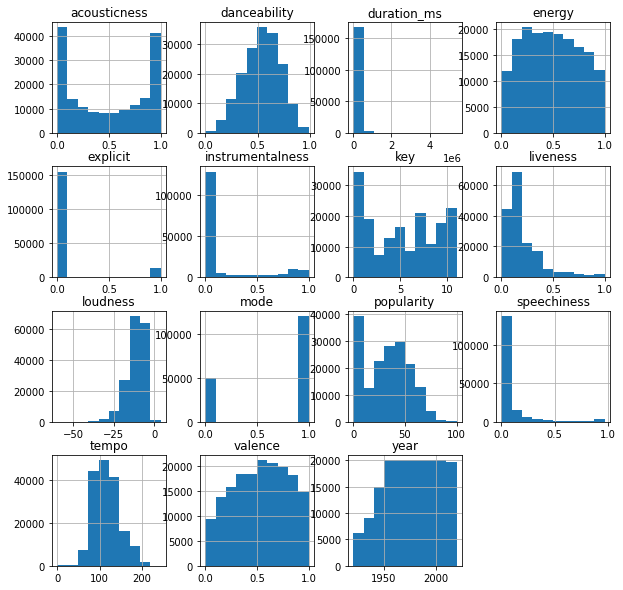

In [14]:
total_data.hist(figsize=(10,10))
plt.show()

Similarly also plotting the scatterplots we get - 

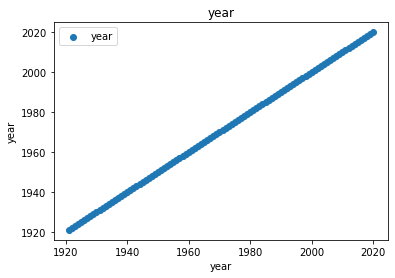

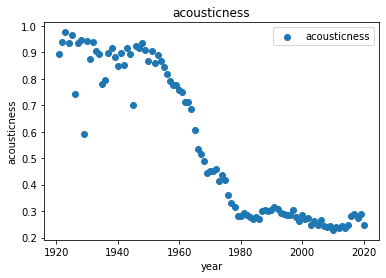

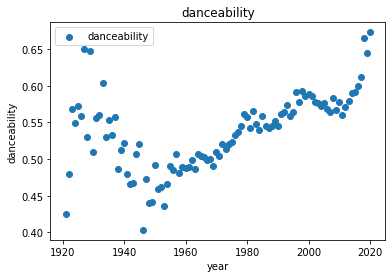

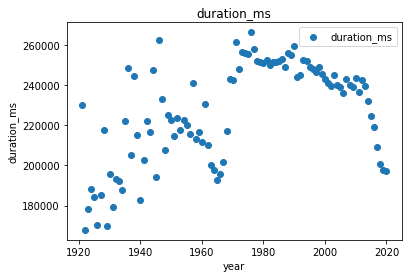

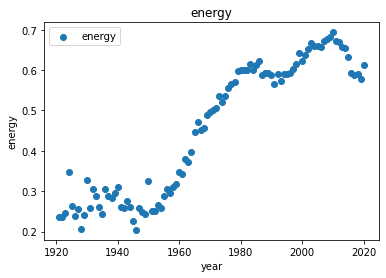

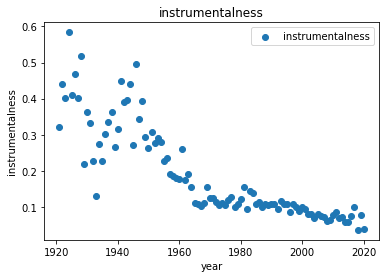

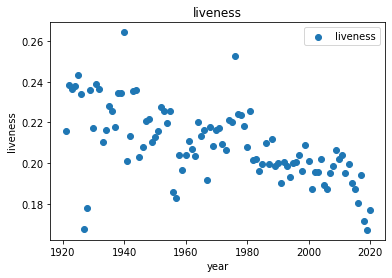

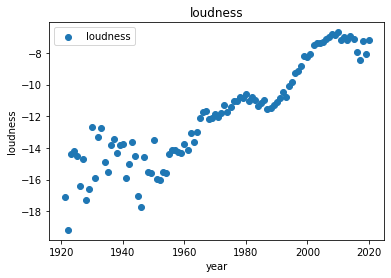

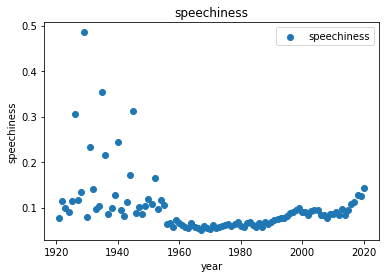

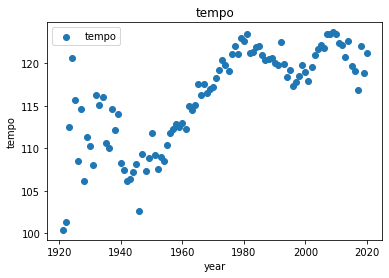

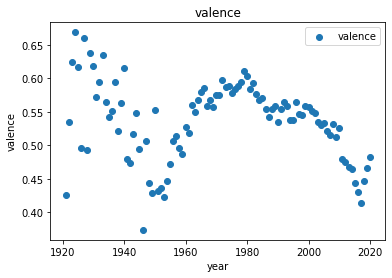

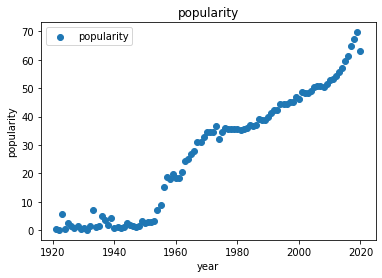

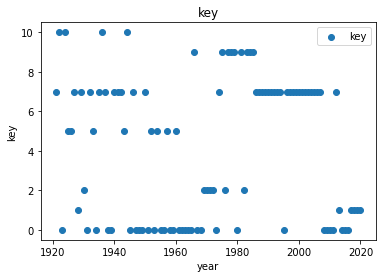

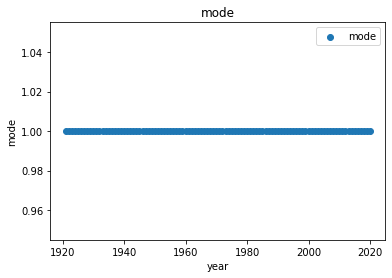

In [15]:
for col in year_data.columns:
    plt.scatter(year_data.year,year_data[col],label=col)
    plt.legend()
    plt.xlabel('year')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

Now let's look at BoxPlots for some of these columns

###  Acousticness

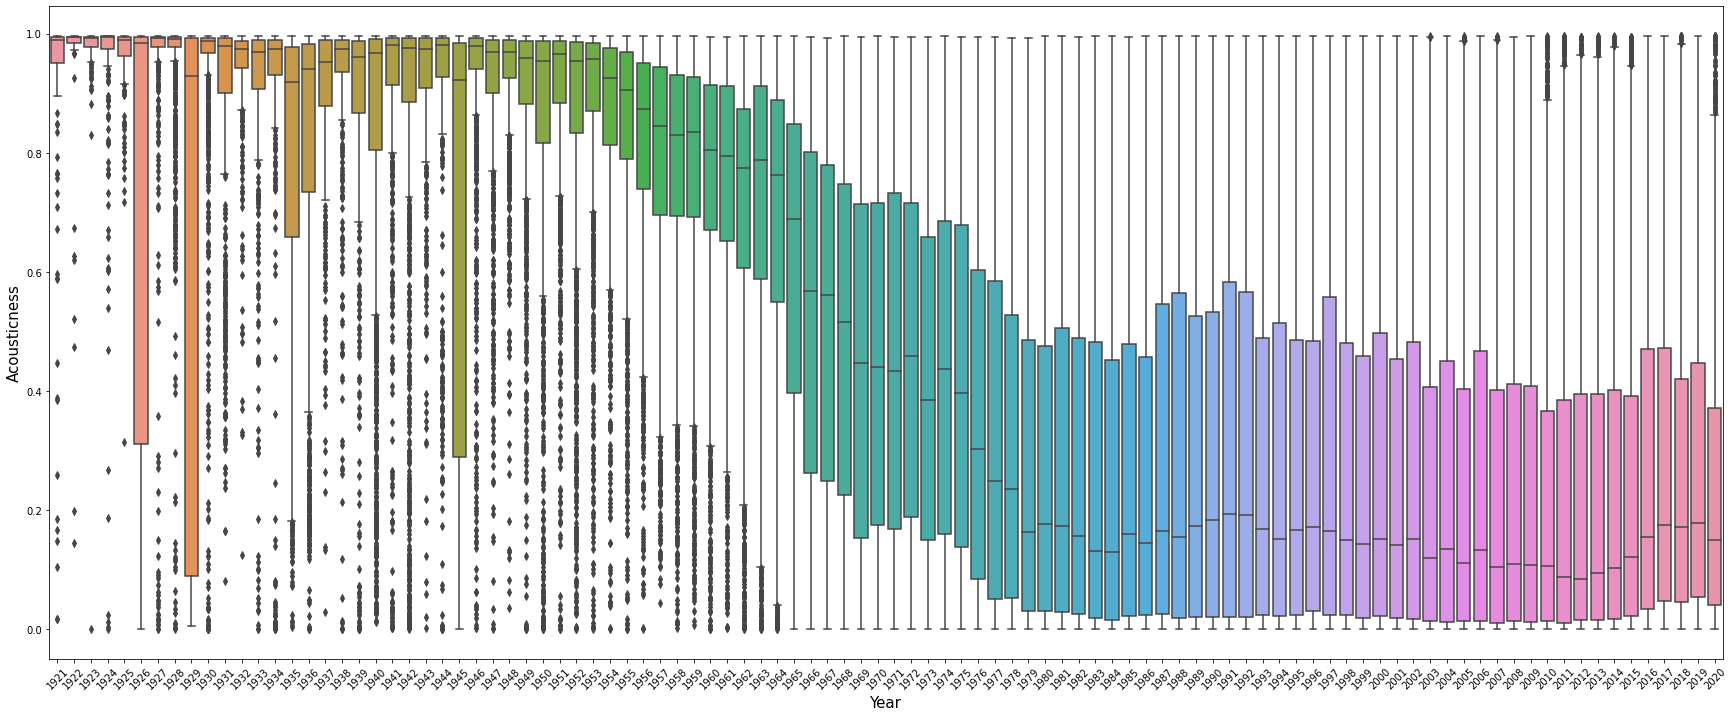

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="acousticness", data=total_data)
plt.xlabel('Year',size=15)
plt.ylabel('Acousticness',size=15)
plt.show()
plt.savefig('Images/AcousticnessBoxPlot.png')

### Danceability

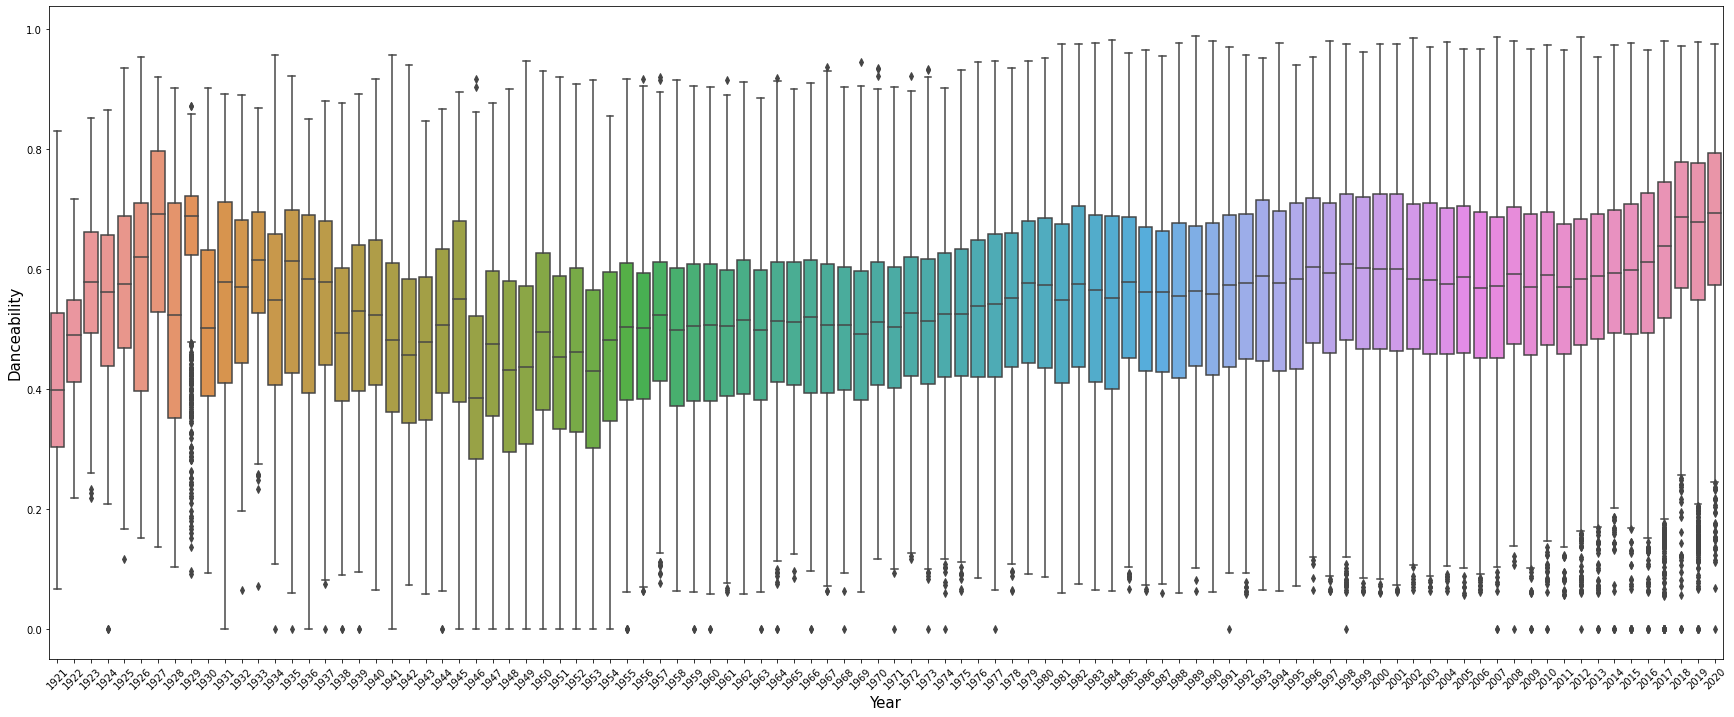

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="danceability", data=total_data)
plt.xlabel('Year',size=15)
plt.ylabel('Danceability',size=15)
plt.show()
plt.savefig('Images/DanceabiltyBoxPlot.png')

### Energy

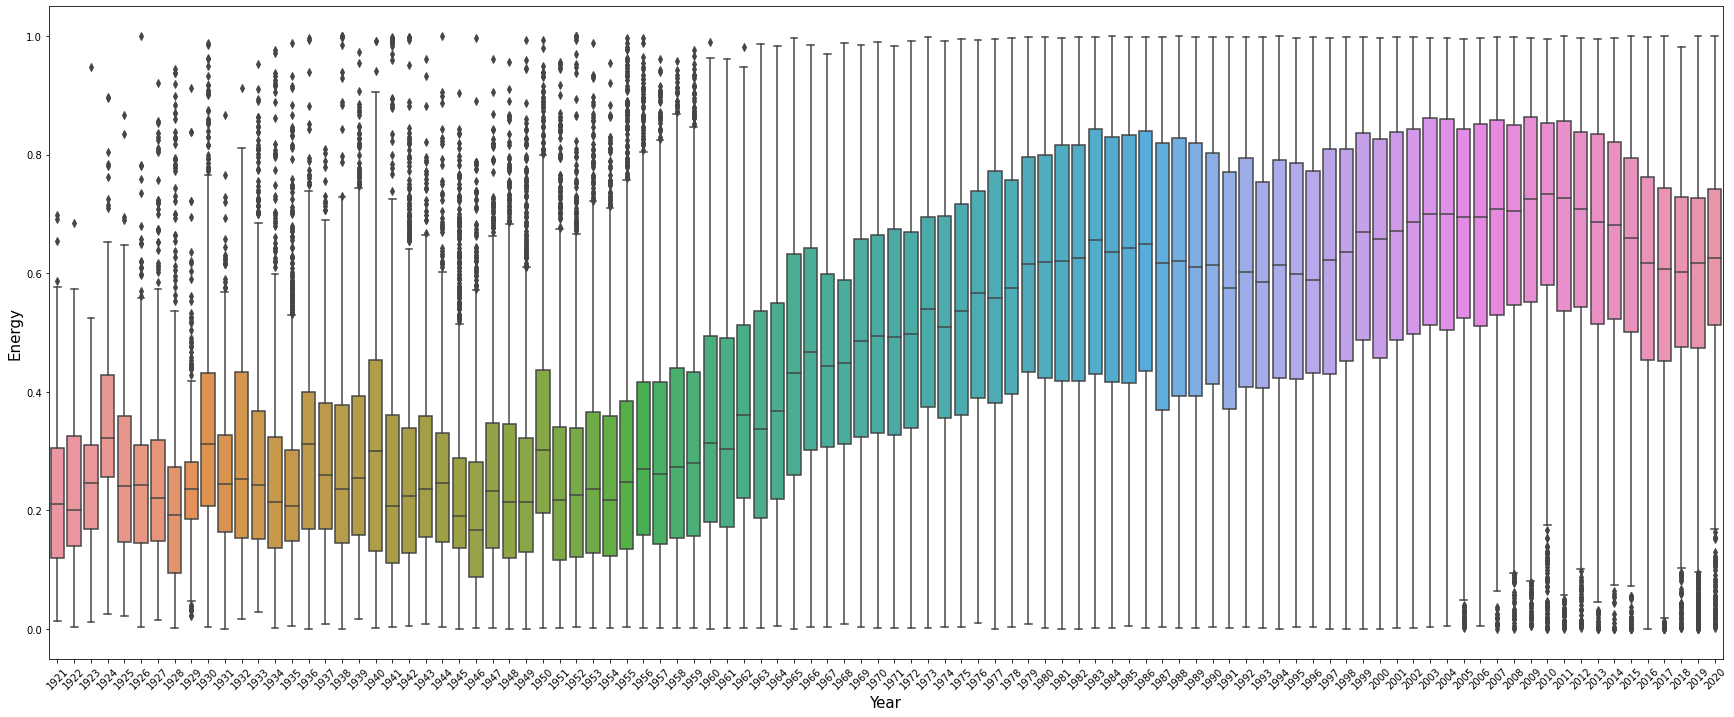

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="energy", data=total_data)
plt.xlabel('Year',size=15)
plt.ylabel('Energy',size=15)
plt.show()
plt.savefig('Images/EnergyBoxPlot.png')

### Loudness

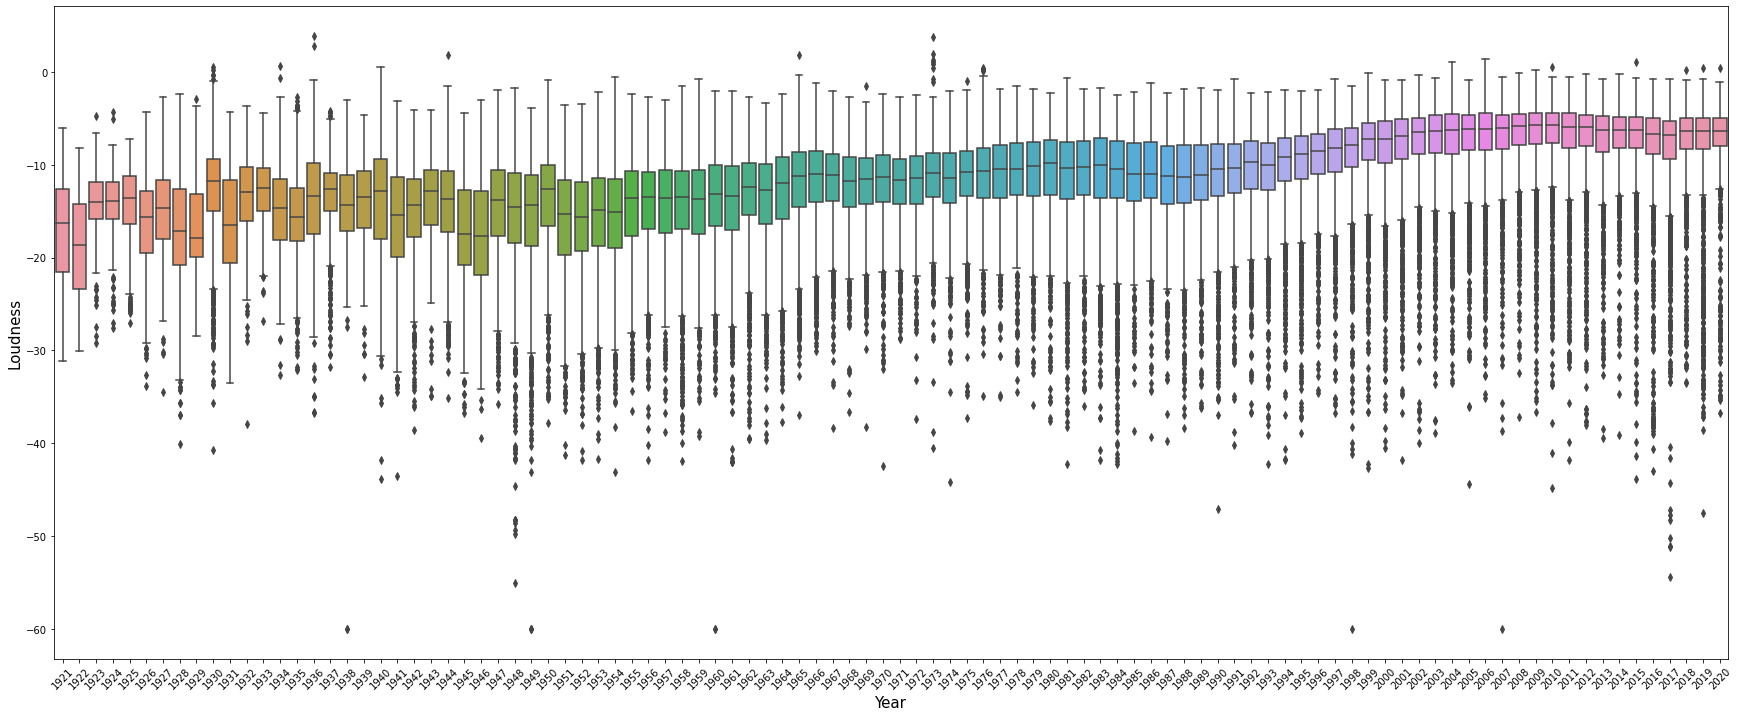

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="loudness", data=total_data)
plt.xlabel('Year',size=15)
plt.ylabel('Loudness',size=15)
plt.show()
plt.savefig('Images/LoudnessBoxPlot.png')

Since some of the outlier songs seem to have really low volume which is leading to the above BoxPlot, and since most of these songs do not seem to be proper songs(silent tracks) we will remove the lower end of this column from the data.

In [24]:
total_data[total_data.loudness==total_data.loudness.min()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
41981,0.0,['Connie Francis'],0.0,179466,0.0,0,0zr7DJGTPUfAUmjM7crmt2,0.0,0,0.0,-60.0,0,Hava Nagilah,12,1960-01-01,0.0,0.0,0.0,1960
48566,0.0,['Sarah Vaughan'],0.0,6467,0.0,0,3lRVIn6D6EUbvkOgPZAU1H,0.0,0,0.0,-60.0,0,Pause Track,0,1949,0.0,0.0,0.0,1949
61074,0.0,['Robert Earl Keen'],0.0,60372,0.0,0,0o12mLSQuXFgsh4e2Kc4e5,0.0,0,0.0,-60.0,0,Silent Track,35,1998-10-27,0.0,0.0,0.0,1998
61972,0.0,['Atlas Fret'],0.0,132827,0.0,0,7cctPQS83y620UQtMd1ilL,0.0,0,0.0,-60.0,0,(silent track),40,2007-01-01,0.0,0.0,0.0,2007
64593,0.0,['Connie Francis'],0.0,253719,0.0,0,5KAJv7Bceihn1frqElloIb,0.0,0,0.0,-60.0,0,My Yiddishe Momme,12,1960-01-01,0.0,0.0,0.0,1960
99092,0.0,['Benny Goodman'],0.0,5991,0.0,0,3IcXTeq9O2dpsSXsDj9naH,0.0,0,0.0,-60.0,0,Pause Track - Live,0,1938,0.0,0.0,0.0,1938
108452,0.0,['Benny Goodman'],0.0,6362,0.0,0,523qs4UcGlQ6ycdha1VGqs,0.0,0,0.0,-60.0,0,Pause Track - Live,0,1938,0.0,0.0,0.0,1938
137188,0.0,['Future Rapper'],0.0,420000,0.0,0,0Rd7eiAZGayLT8TmrVpQzG,0.0,0,0.0,-60.0,0,StaggerLee Has His Day at the Beach,0,1949-02-17,0.0,0.0,0.0,1949
145844,0.0,['Sarah Vaughan'],0.0,5108,0.0,0,0hr9kRUi2X4MXc72A4VxG4,0.0,0,0.0,-60.0,0,Pause Track,0,1949,0.0,0.0,0.0,1949


In [27]:
total_data_clean = total_data[total_data.loudness > -60.0]
total_data_clean[total_data_clean.loudness==total_data_clean.loudness.min()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
24962,0.13,"['Igor Stravinsky', 'Michael Tilson Thomas']",0.157,22973,0.000246,0,5N5AuKydDEm9XwHloVw7L7,0.991,10,0.0671,-55.0,0,Le sacre du printemps (The Rite of Spring): Pr...,0,1948,0.0521,129.334,0.0,1948


Now plotting with the new cleaned data

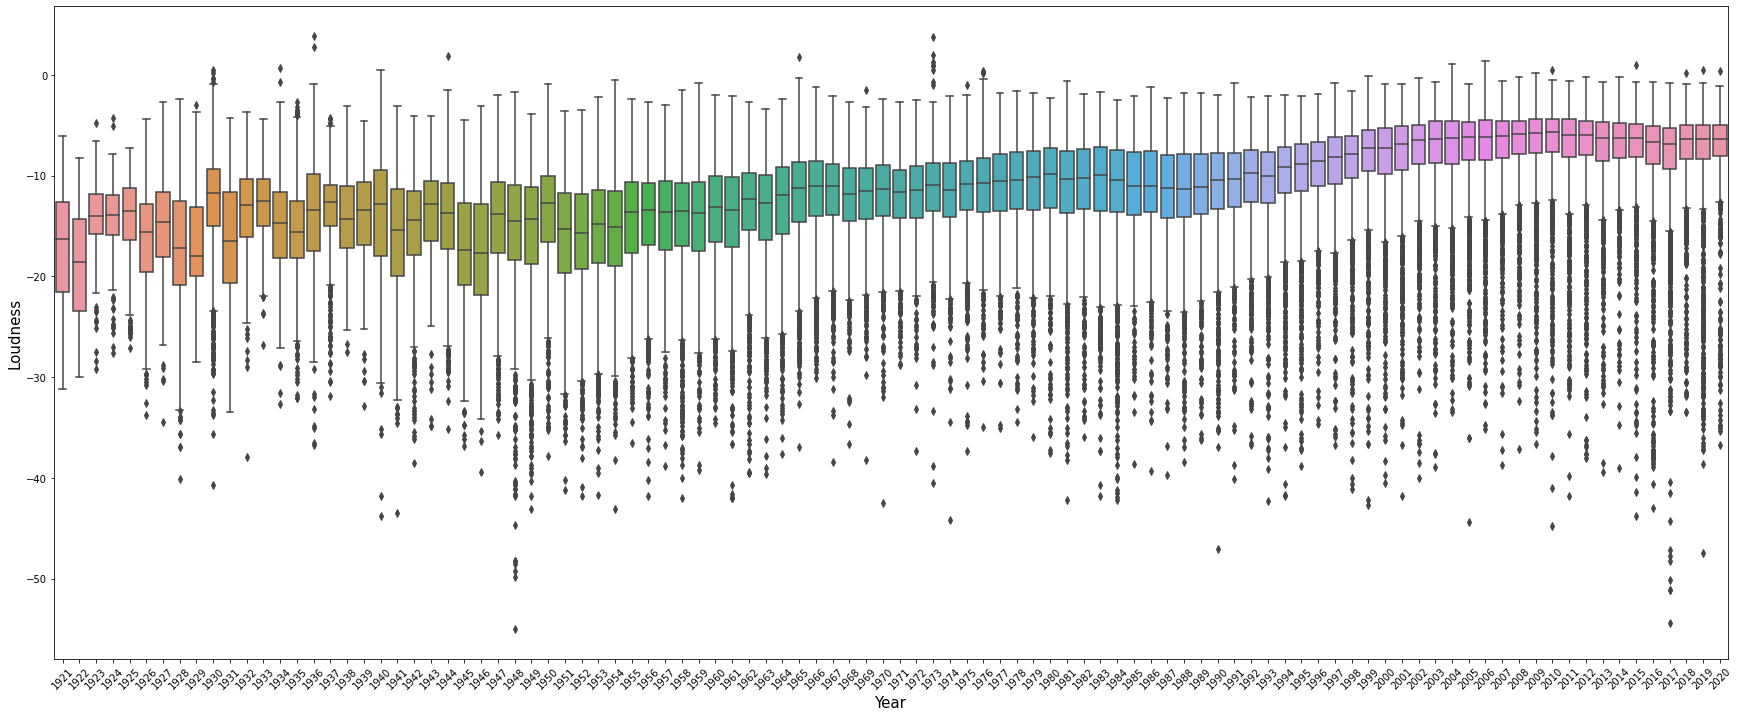

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="loudness", data=total_data_clean)
plt.xlabel('Year',size=15)
plt.ylabel('Loudness',size=15)
plt.show()
plt.savefig('Images/LoudnessBoxPlot.png')

### Duration

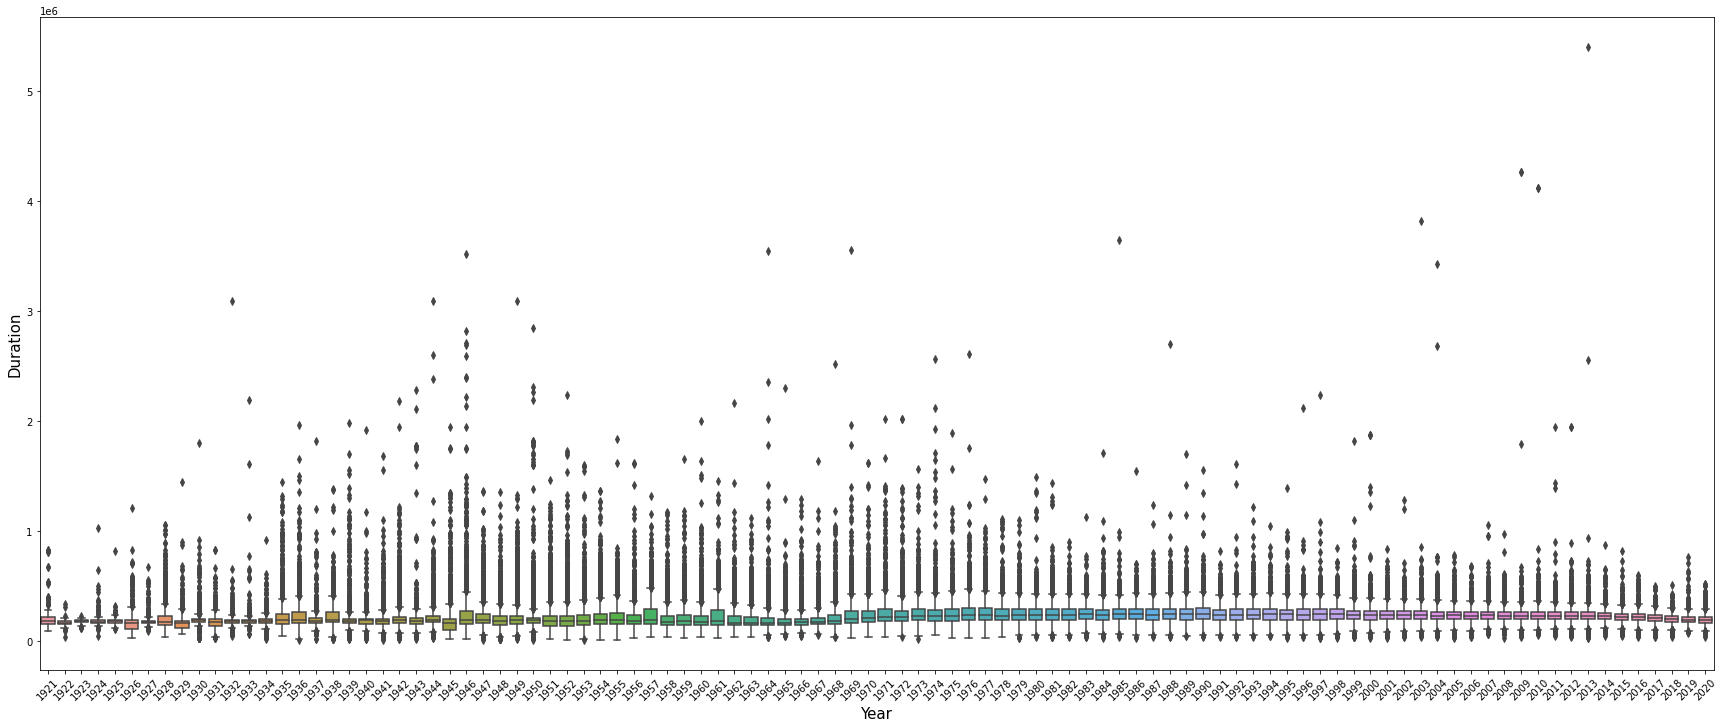

In [31]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="duration_ms", data=total_data_clean)
plt.xlabel('Year',size=15)
plt.ylabel('Duration',size=15)
plt.show()
# plt.savefig('Images/DurationBoxPlot.png')

The graph has been shifted down due to the existence of a lot of outliers with really high durations.

In [33]:
total_data_clean[total_data_clean.duration_ms == total_data_clean.duration_ms.max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7411,0.111,['Sound Dreamer'],0.0,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0,0.0,0.0,2013


Since most of these loud songs similar to the one above seem to be very long noise/asmr sound tracks let us remove these from the data, leaving songs deviating less than 2 standard deviations from the mean.

In [34]:
from scipy import stats
total_data_clean_2 = total_data_clean[(np.abs(stats.zscore(total_data_clean.duration_ms)) < 2)]

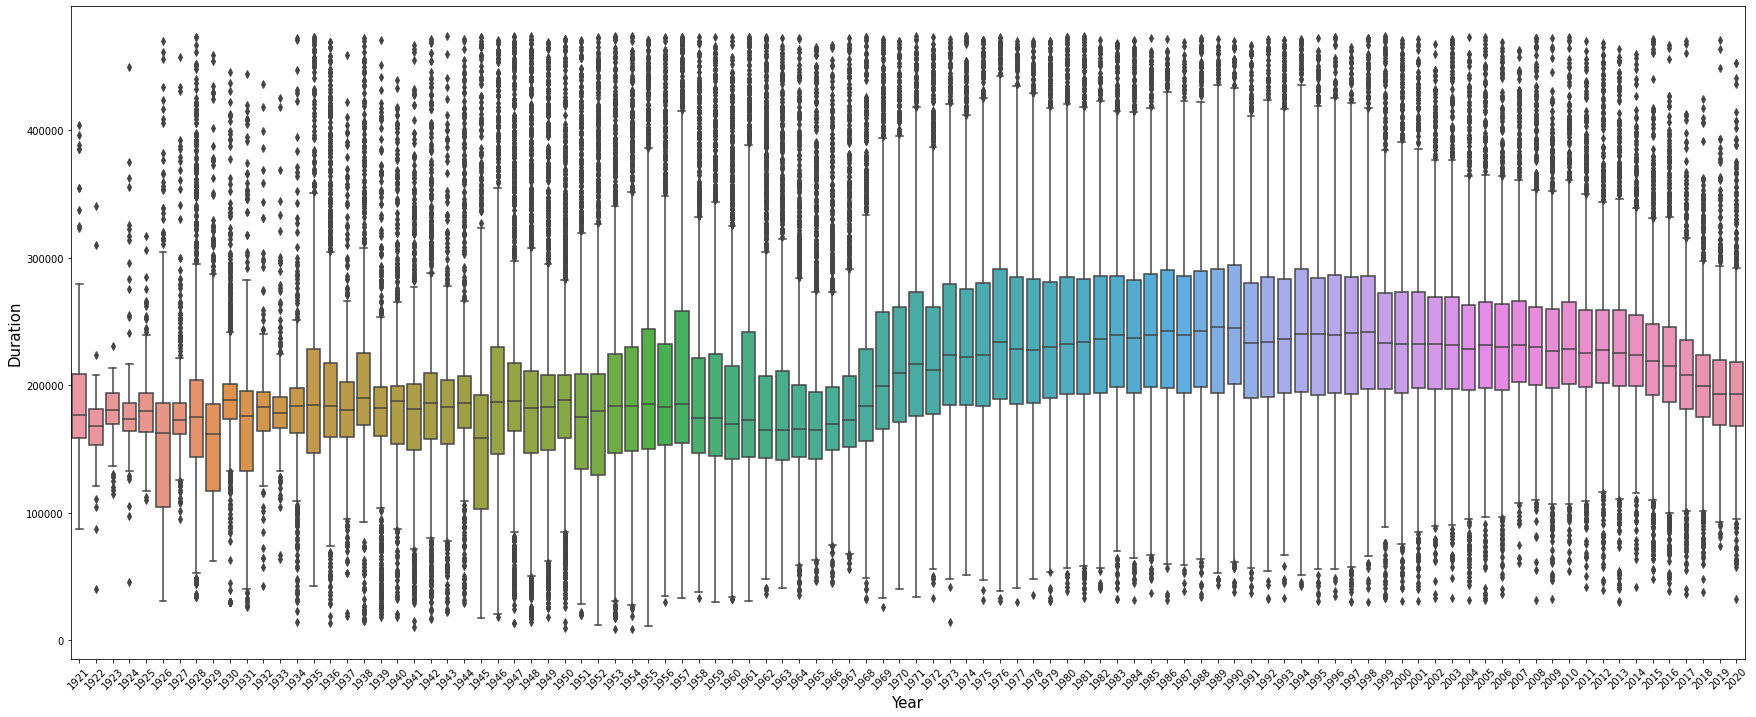

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="duration_ms", data=total_data_clean_2)
plt.xlabel('Year',size=15)
plt.ylabel('Duration',size=15)
plt.show()
plt.savefig('Images/DurationBoxPlot.png')

As we can see the above plot is now much more balanced, though we can see the outlier values are still deviating the mean by a lot and the median seems to a better representation for the data.

### Instrumentalness

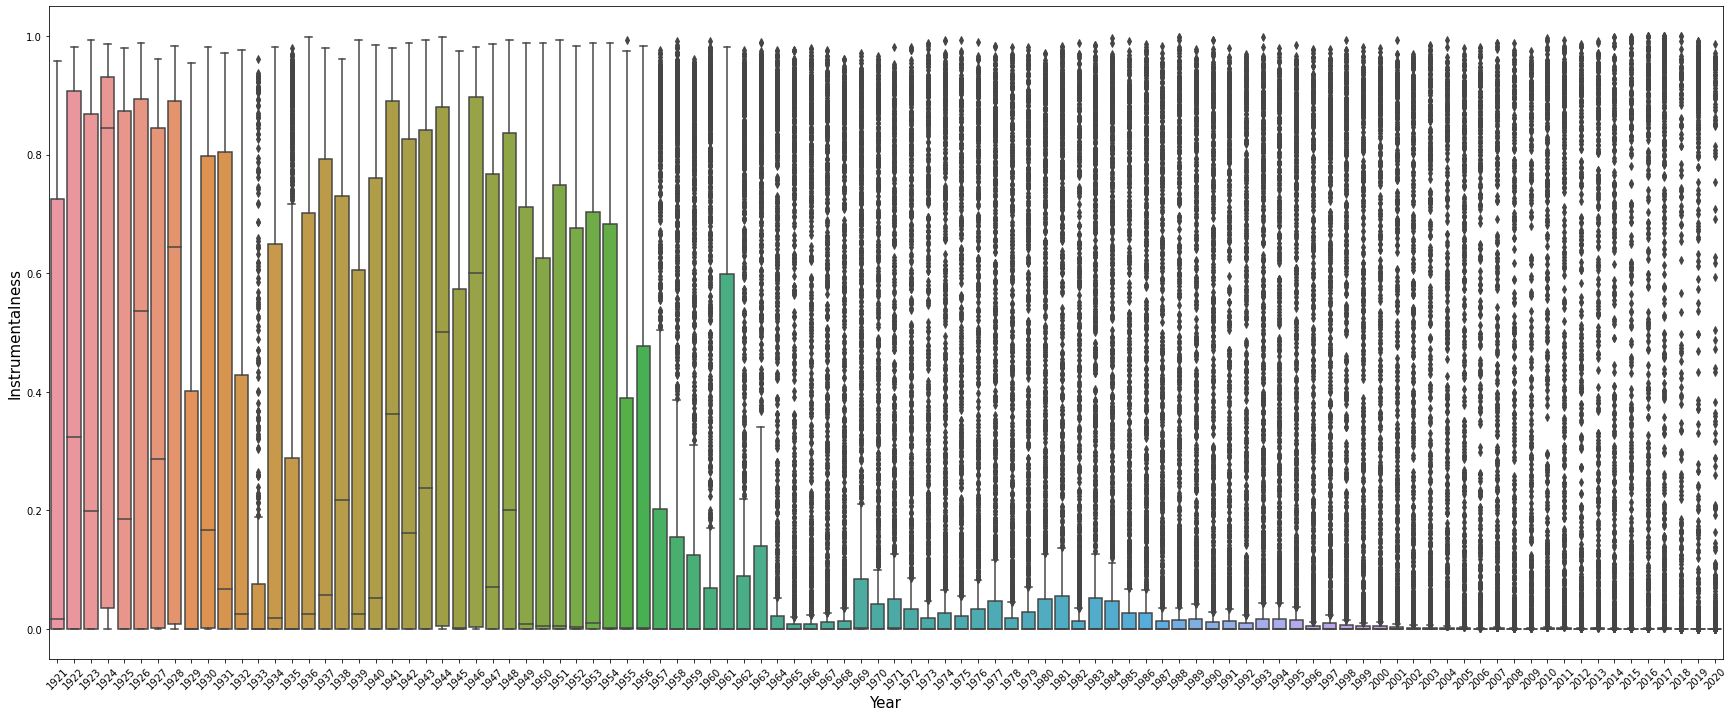

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="instrumentalness", data=total_data_clean_2)
plt.xlabel('Year',size=15)
plt.ylabel('Instrumentalness',size=15)
plt.show()
plt.savefig('Images/InstrumentalnessBoxPlot.png')

The above plot seems to indicate that over the years vocals seem to have become a lot more popular then intrumental tracks.

### Liveness

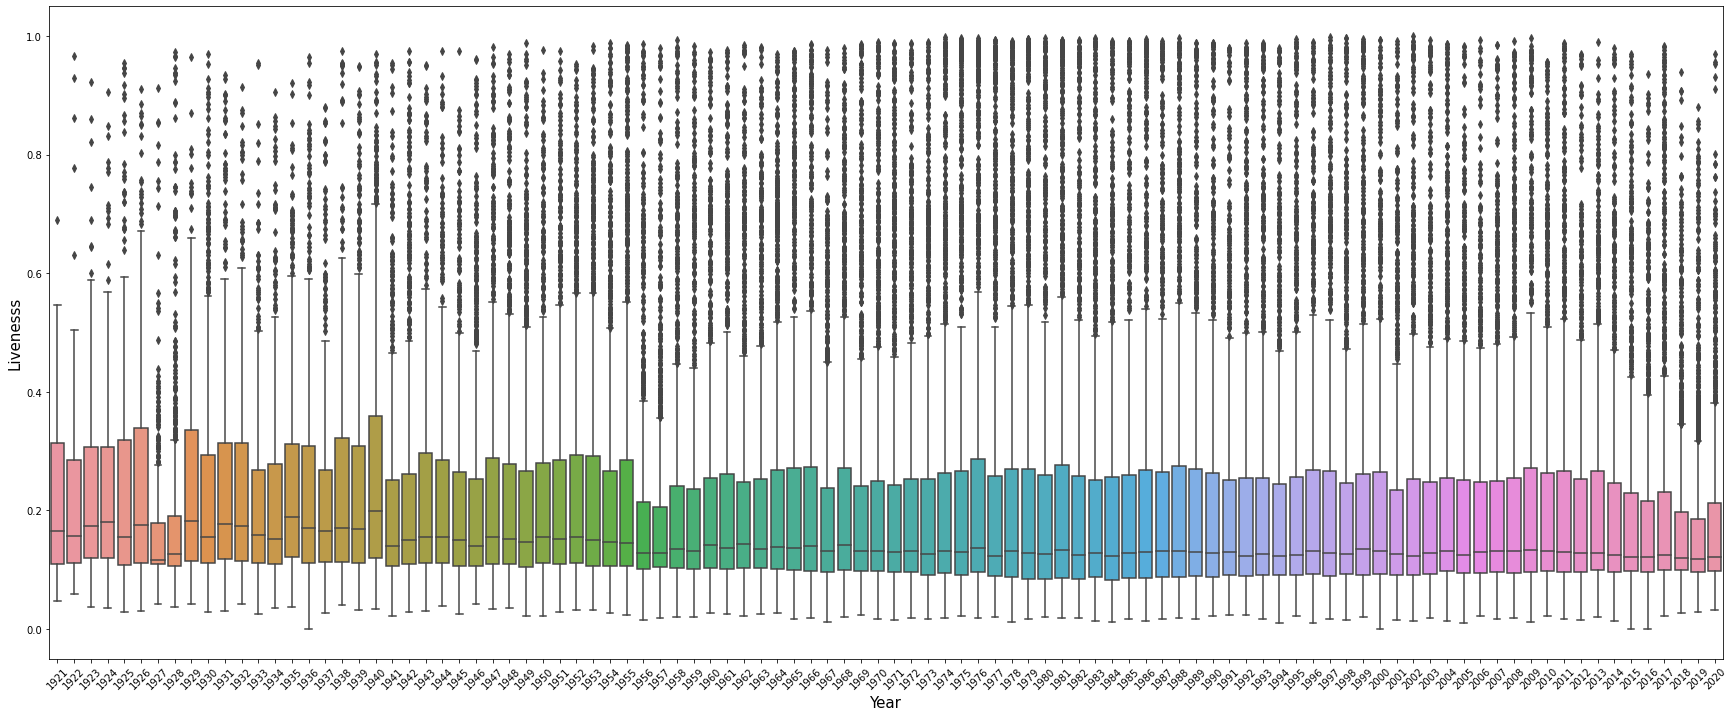

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="liveness", data=total_data_clean_2)
plt.xlabel('Year',size=15)
plt.ylabel('Livenesss',size=15)
plt.show()
plt.savefig('Images/LivenessBoxPlot.png')

The plot has more or less remained the same over the years indicating that most tracks throughout the perod are not recorded live. This is also amplified by the fact that spotify usually tends to get most of the studio recordings and perhaps a dataset derived from a platform like youtube may get more skewed results.

### Speechiness

Speechiness indicated the portion of a track which is just composed of vocal, with values greater than 0.7 indicating a very high probability of the track being just words instead of music, thus we will clean these values form the data.

In [40]:
total_data_clean_3 = total_data_clean_2[total_data_clean_2.speechiness<0.7]

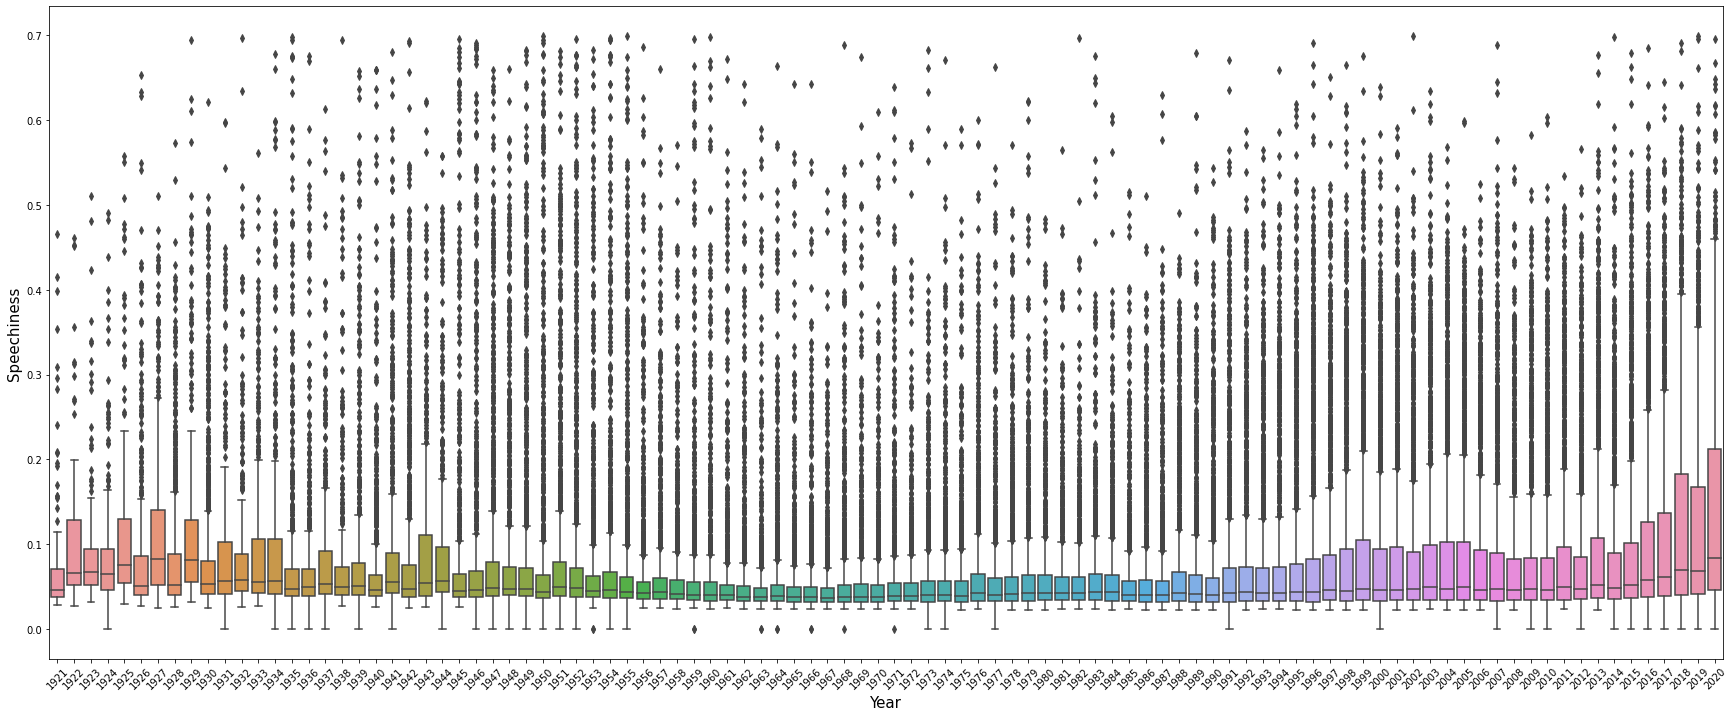

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="speechiness", data=total_data_clean_3)
plt.xlabel('Year',size=15)
plt.ylabel('Speechiness',size=15)
plt.show()
plt.savefig('Images/SpeechinessBoxPlot.png')

Since removing the upper values has compressed the plot by a lot, we will normalise these values for better performance on the ML models.

In [64]:
a = total_data_clean_3['speechiness'].values/total_data_clean_3['speechiness'].max()
total_data_clean_3.update({'speechiness':total_data_clean_3['speechiness'].values/total_data_clean_3['speechiness'].max()})


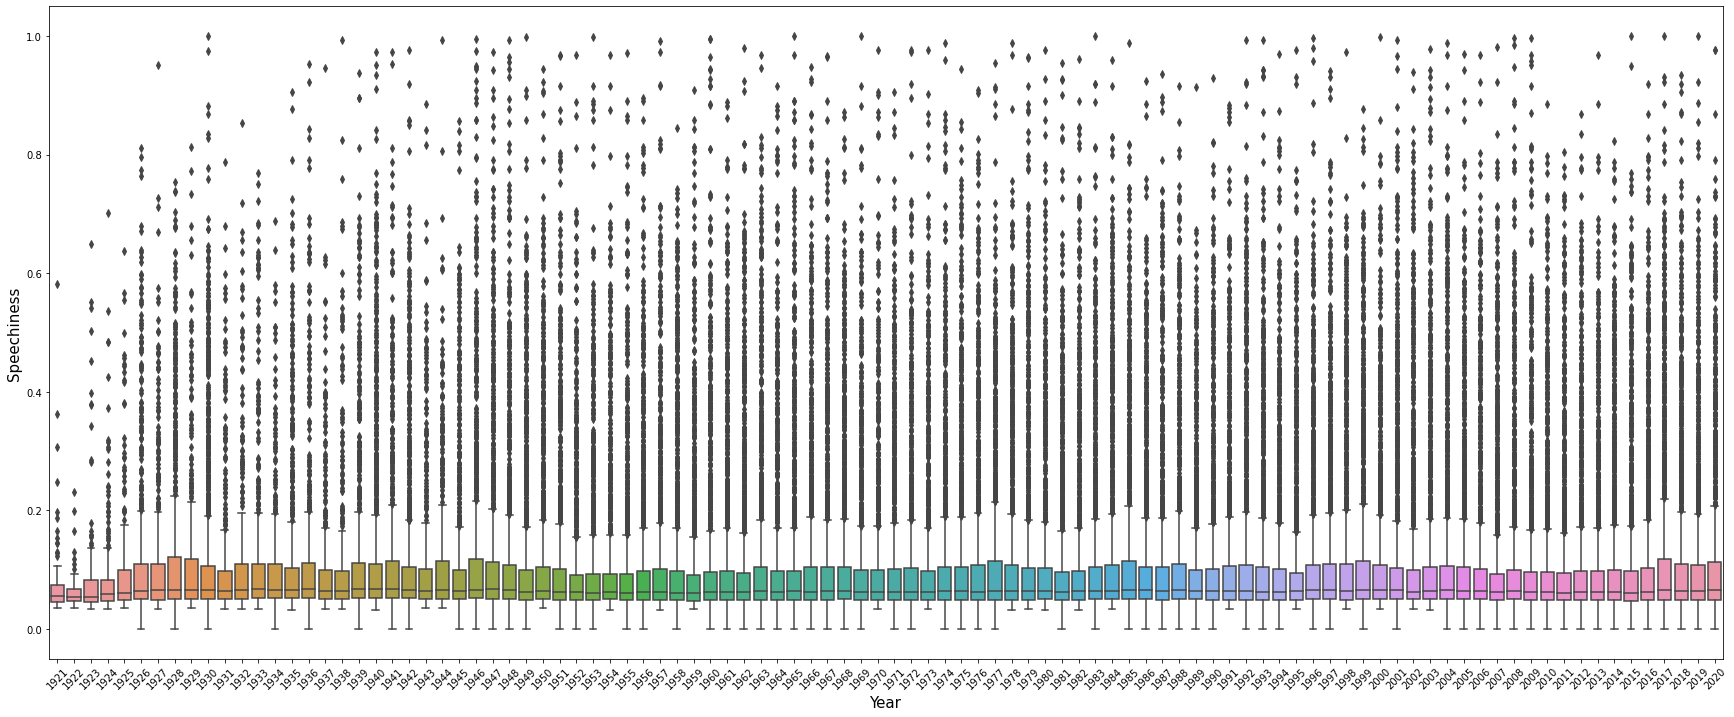

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x='year',y="speechiness", data=total_data_clean_3)
plt.xlabel('Year',size=15)
plt.ylabel('Speechiness',size=15)
plt.show()
plt.savefig('Images/SpeechinessBoxPlot.png')

In [66]:
total_data_clean_3['speechiness'].max()

1.0

### tempo

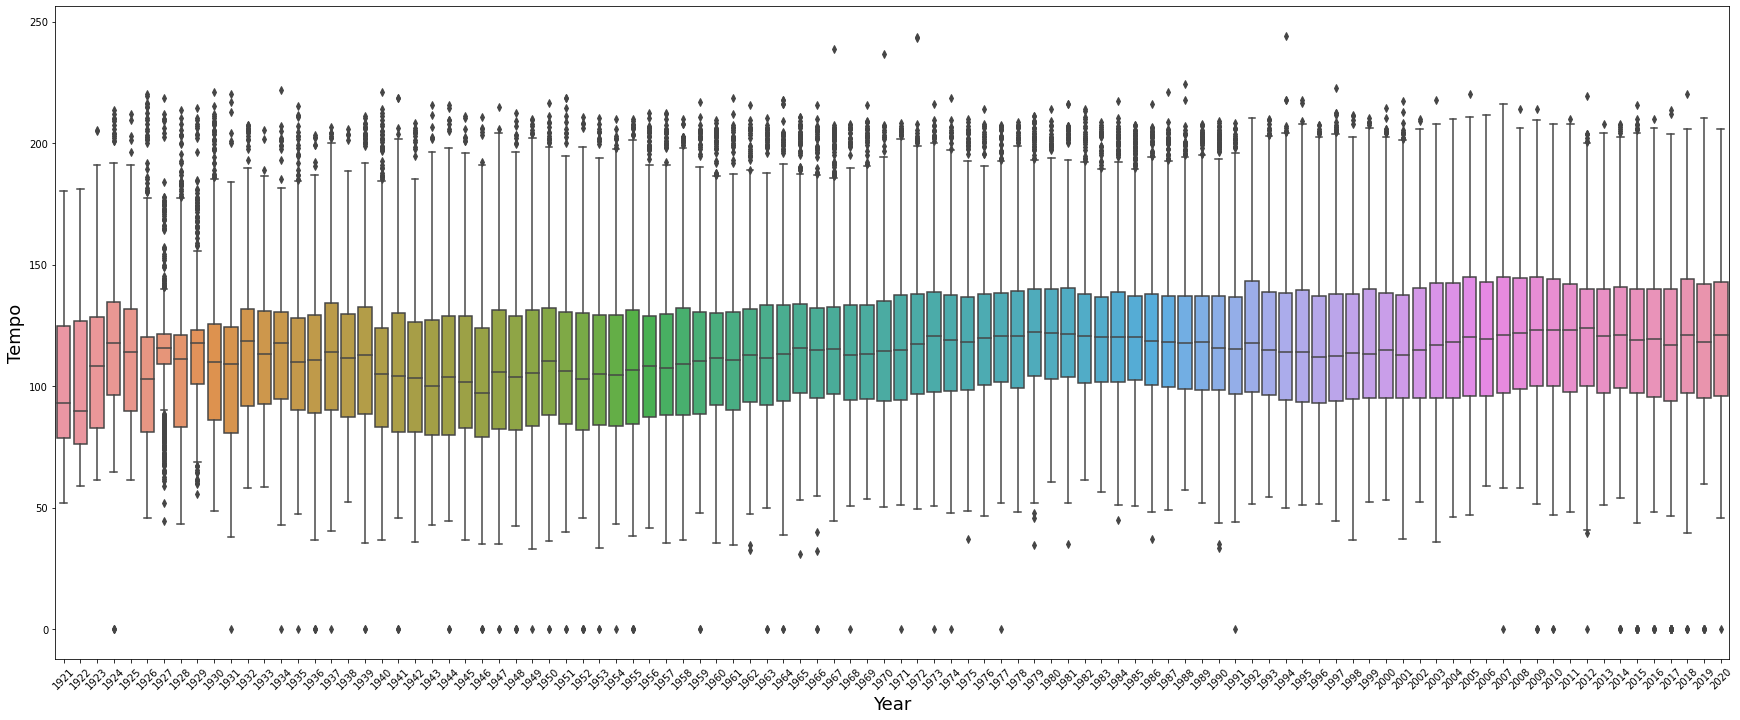

In [67]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="tempo", data=total_data_clean_3)
plt.xlabel("Year", size=18)
plt.ylabel("Tempo", size=18)
plt.savefig('Images/TempoBoxPlot.png')

In [69]:
total_data_clean_3[total_data_clean_3.tempo == total_data_clean_3.tempo.max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,speechienss
29611,0.561,['Bill Withers'],0.538,276733,0.389,0,3BaFRtmUWO1Z3gzc9zYRh2,0.357,11,0.0864,-13.558,0,I Don't Want You On My Mind,40,1994-08-09,0.03877,244.091,0.79,1994,0.069528


Removing tracks with 0 tempo (White noise tracks)

In [70]:
total_data_clean_3[total_data_clean_3.tempo == total_data_clean_3.tempo.min()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,speechienss
1269,0.976000,"['Richard Wagner', 'Keilberth', 'Varnay', 'Lor...",0.0,212667,0.085400,0,19Ttq3sjIl5pW9wT7ZFfmY,0.000105,7,0.343,-21.505,1,"Götterdämmerung : Act 1 : Willkommen, Gast, In...",0,1952,0.079113,0.0,0.0,1952,0.0
2721,0.099500,['Frank Sinatra'],0.0,60280,0.906000,0,0P7TUyrm6OfIDJJKcidvnu,0.000018,1,0.366,-6.227,1,My Kind Of Town (Reprise) - Live At The Sands ...,22,1966-07,0.072103,0.0,0.0,1966,0.0
3387,0.756000,['Waylon Jennings'],0.0,14708,0.048400,0,2mex2o4uA69pMcLjMtyyGb,0.000144,4,0.166,-18.198,1,Ride Me Down Easy,29,1973-07-01,0.310443,0.0,0.0,1973,0.0
8834,0.976000,"['Giacomo Puccini', 'Arturo Toscanini']",0.0,165520,0.210000,0,5rPQIsOgxpUe48ffvw7OJ0,0.000261,1,0.869,-17.348,1,La Bohème: Act I: Si può? - Chi è là? - Benoit!,4,1946,0.056795,0.0,0.0,1946,0.0
9389,0.297000,"['Dizzy Gillespie', 'Charlie Parker', 'Theloni...",0.0,14960,0.774000,0,1PLQCyQ4CmoFlSJTyj7Yw1,0.000022,8,0.218,-11.730,1,Leap Frog - Take 4 / Incomplete,0,1952-01-01,0.043634,0.0,0.0,1952,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162730,0.951000,"['Igor Stravinsky', 'Columbia Symphony Orchest...",0.0,63373,0.126000,0,3l4zPozgfoLhF6JnUfWDMf,0.689000,8,0.608,-16.260,1,L'Oiseau de feu: Dialogue de Kachtchei avec Iv...,0,1948,0.000000,0.0,0.0,1948,0.0
164201,0.862000,['Bill Cosby'],0.0,215280,0.770000,0,2W0KFIFBFcLBlklD7ugiw6,0.000002,9,0.694,-15.316,0,Noah: Right!,16,1963,0.000000,0.0,0.0,1963,0.0
169522,0.913000,['Granular'],0.0,205161,0.000164,0,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,2017-10-14,0.000000,0.0,0.0,2017,0.0
169743,0.000013,['Naturaleza FX'],0.0,150879,0.000020,0,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,2019-10-10,0.000000,0.0,0.0,2019,0.0


In [71]:
total_data_clean_4 = total_data_clean_3[total_data_clean_3.tempo != 0.0]

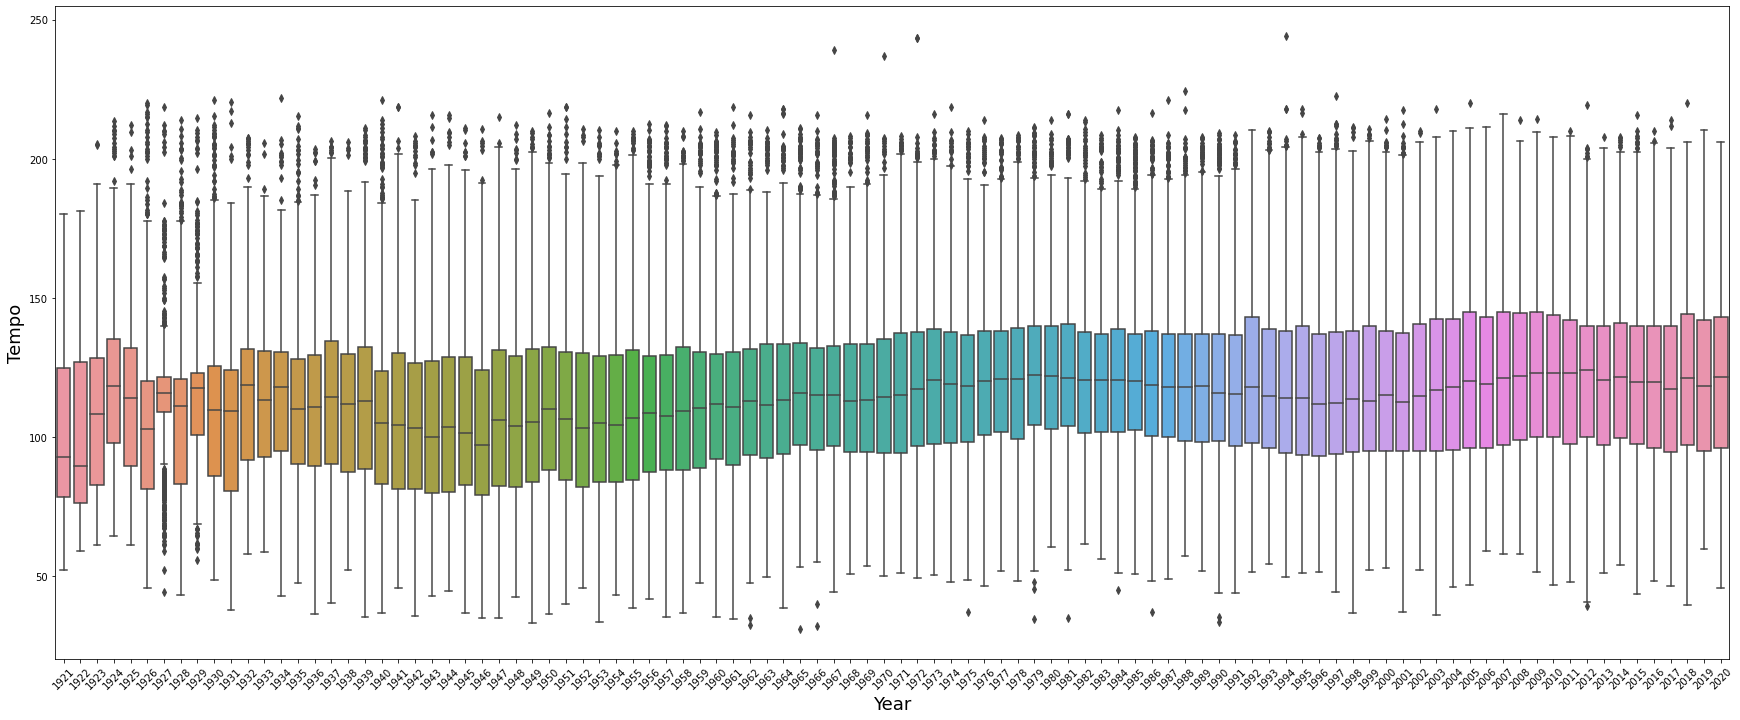

In [72]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="tempo", data=total_data_clean_4)
plt.xlabel("Year", size=18)
plt.ylabel("Tempo", size=18)
plt.savefig('Images/TempoBoxPlot.png')

Valence

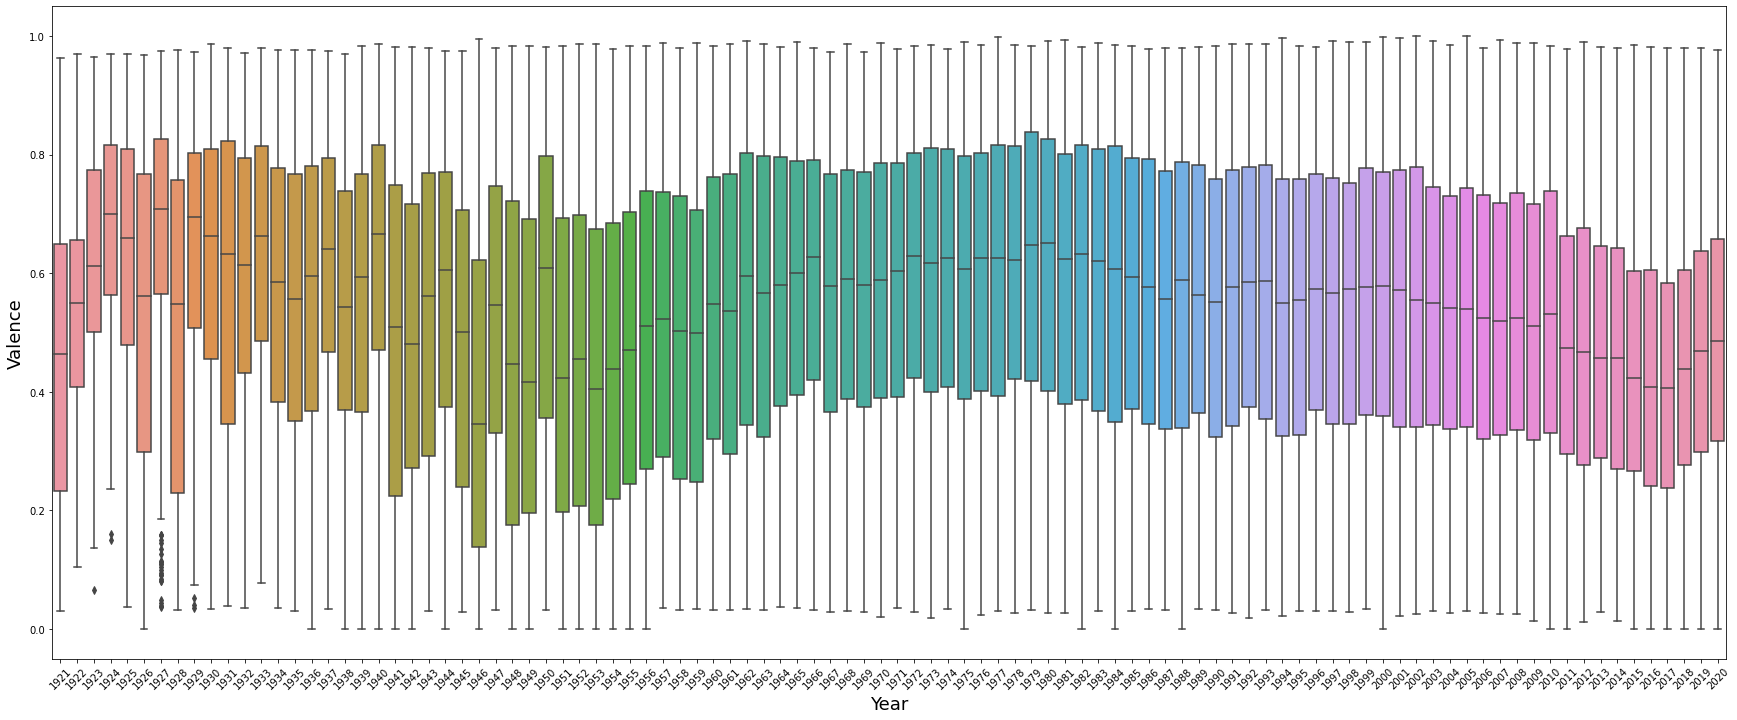

In [73]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="valence", data=total_data_clean_4)
plt.xlabel("Year", size=18)
plt.ylabel("Valence", size=18)
plt.savefig('Images/valence.png')

### Popularity

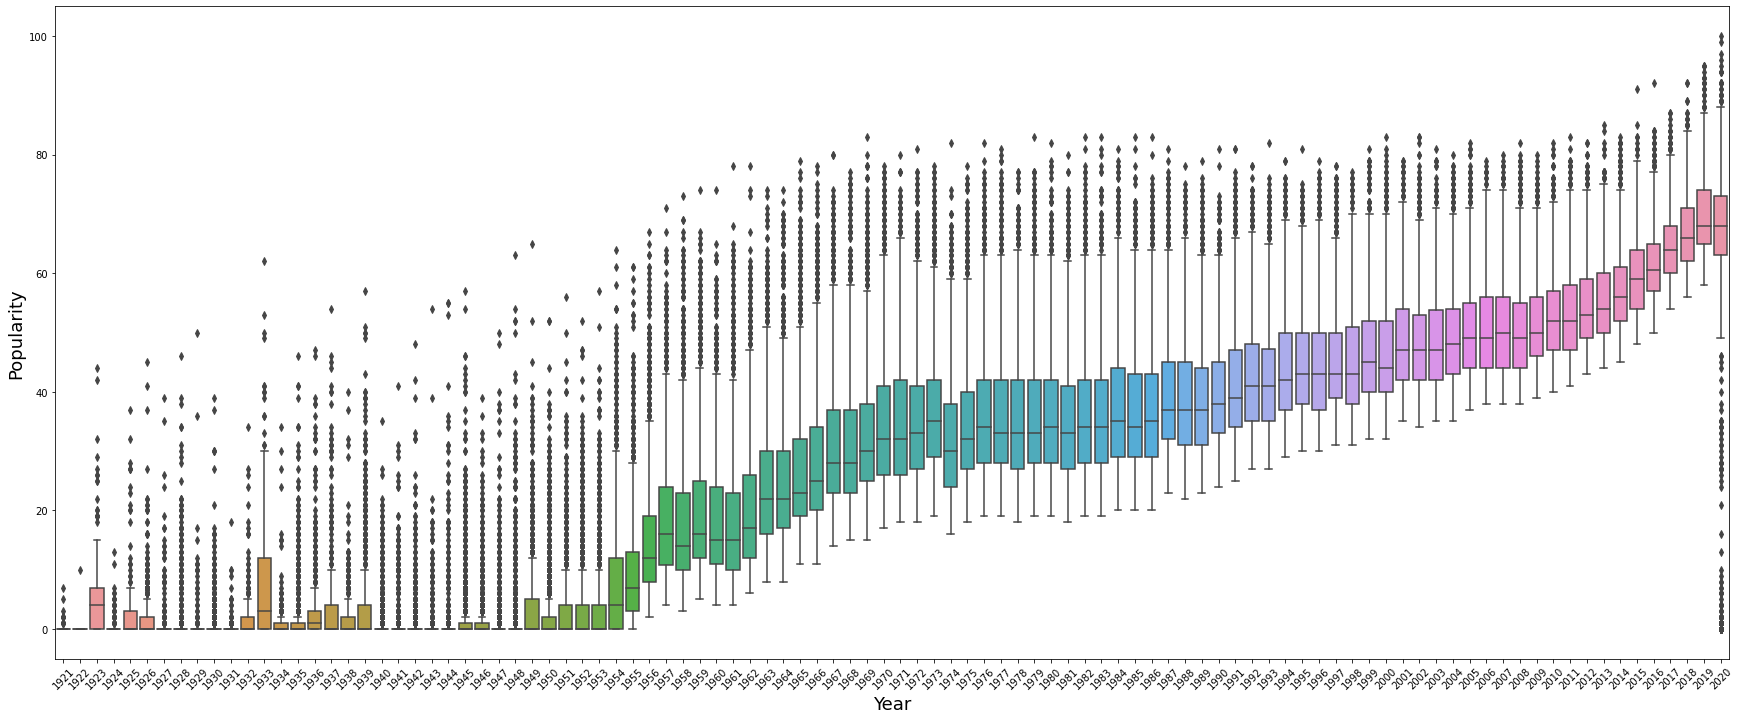

In [74]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="popularity", data=total_data_clean_4)
plt.xlabel("Year", size=18)
plt.ylabel("Popularity", size=18)
plt.savefig('Images/popularity.png')

Key

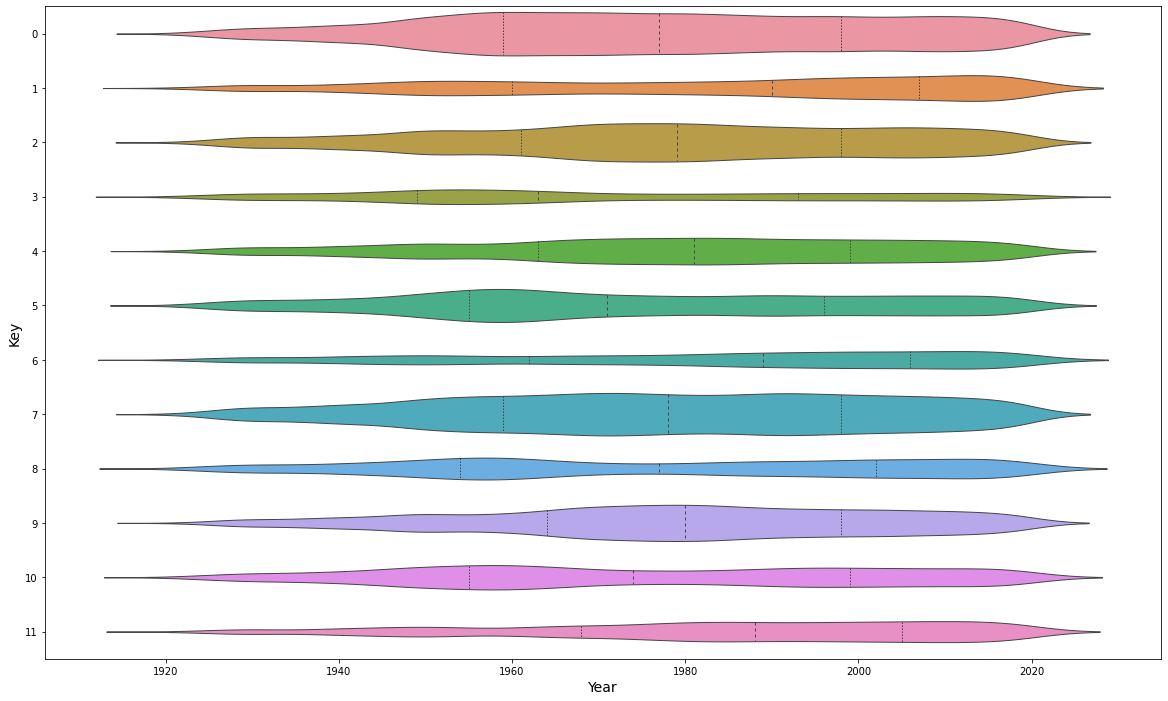

In [75]:
plt.figure(figsize=(20, 12))
sns.violinplot(data=total_data_clean_4, x="year", y="key",
               split=True, inner="quart", linewidth=1, orient="h", scale='count')
plt.xlabel("Year", size=14)
plt.ylabel("Key", size=14)

plt.savefig('Images/KeyViolinPlot.png')

As we can see that keys 0,7,2,9 seem to be the more popular key choices.

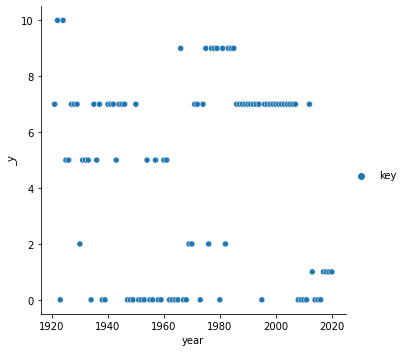

In [76]:
yrly_key_mode = total_data_clean_4.groupby('year').apply(lambda x: x['key'].value_counts().idxmax()).to_frame(name="key")
# yrly_key_mode.rename(columns={"0": "key"}, inplace=True)
sns.relplot(data=yrly_key_mode)

Finally let's modify the data columns for the above database to create a new data_by_year dataframe with median values instead of mean values ( as we have seen in the above analysis that the mean seems to get swayed by the outliers for a lot of columns) which we will use for the Time series Modelling.

In [77]:
median_yrly_acousticness = total_data_clean_4.groupby('year', as_index=False)['acousticness'].median()
median_yrly_danceability = total_data_clean_4.groupby('year', as_index=False)['danceability'].median()
median_yrly_duration = total_data_clean_4.groupby('year', as_index=False)['duration_ms'].median()
median_yrly_energy = total_data_clean_4.groupby('year', as_index=False)['energy'].median()
median_yrly_loudness = total_data_clean_4.groupby('year', as_index=False)['loudness'].median()
median_yrly_instrumentalness = total_data_clean_4.groupby('year', as_index=False)['instrumentalness'].median()
median_yrly_liveness = total_data_clean_4.groupby('year', as_index=False)['liveness'].median()
median_yrly_speechiness = total_data_clean_4.groupby('year', as_index=False)['speechiness'].median()
median_yrly_tempo = total_data_clean_4.groupby('year', as_index=False)['tempo'].median()
median_yrly_valence = total_data_clean_4.groupby('year', as_index=False)['valence'].median()
median_yrly_popularity = total_data_clean_4.groupby('year', as_index=False)['popularity'].median()


all_dfs = [median_yrly_acousticness,
               median_yrly_danceability,
               median_yrly_duration,
               median_yrly_energy,
               median_yrly_loudness,
               median_yrly_instrumentalness,
               median_yrly_liveness,
               median_yrly_speechiness,
               median_yrly_tempo,
               median_yrly_valence,
               median_yrly_popularity,
               yrly_key_mode]

yearly_merged = reduce(lambda left,right: pd.merge(left,right,on=['year'],
                                            how='outer'), all_dfs)
yearly_merged

,year,acousticness,danceability,duration_ms,energy,loudness,instrumentalness,liveness,speechiness,tempo,valence,popularity,key
0,1921,0.9900,0.4180,177067.0,0.2260,-15.8010,0.016700,0.1660,0.055508,92.8670,0.4630,0.0,7
1,1922,0.9940,0.4895,168053.5,0.2010,-18.6210,0.324500,0.1575,0.053290,89.6905,0.5490,0.0,10
2,1923,0.9920,0.5765,180347.0,0.2465,-13.9605,0.218000,0.1725,0.054435,108.3805,0.6115,4.0,0
3,1924,0.9940,0.5650,173713.0,0.3240,-13.8655,0.844000,0.1830,0.058512,118.2455,0.6995,0.0,10
4,1925,0.9890,0.5750,179360.0,0.2390,-13.5520,0.174000,0.1550,0.060086,114.0380,0.6590,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016,0.1520,0.6140,215025.0,0.6180,-6.6025,0.000002,0.1210,0.062303,119.8800,0.4090,60.5,0
96,2017,0.1720,0.6400,209122.0,0.6090,-6.8070,0.000002,0.1250,0.065236,117.2660,0.4070,64.0,1
97,2018,0.1710,0.6870,199520.0,0.6030,-6.3720,0.000000,0.1200,0.065093,121.0780,0.4380,66.0,1
98,2019,0.1780,0.6795,193860.0,0.6200,-6.3295,0.000000,0.1180,0.064092,118.1620,0.4695,68.0,1


In [79]:
yearly_merged.to_csv(r'DataSet/yearly_merged.csv', index = False)

In [80]:
cleaned_all_tracks = total_data_clean_4
cleaned_all_tracks.to_csv(r'DataSet/cleaned_all_tracks.csv', index = False)